In [1]:
import numpy as np
import gymnasium as gym
from collections import defaultdict  # required for creating Q(s, a)
from moviepy import ImageSequenceClip # to generate gif
from IPython.display import Image

import matplotlib 
#matplotlib.use('Qt5Agg') # Activte it if you want external plot for any interaction
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Frozen Lake

* **States**: The environment consists of 16 discrete states, representing the grid's cells.
* **Actions**: The agent can take one of four actions: left, down, right, or up.
* **Goal**: The goal is to navigate to the 'G' state.
* **Rewards**: The agent receives a reward of `1` for reaching the goal state, and the episode terminates if it falls into a hole, which yields a reward of `0`.

Since you've set `is_slippery=False`, the environment is **deterministic**, meaning that the agent will always move exactly as instructed by its actions, without any randomness in how the environment behaves.




In [2]:
# Default reward schedule:

# Reach goal: +1

# Reach hole: 0

# Reach frozen: 0





# 0: Move left

# 1: Move down

# 2: Move right

# 3: Move up


# The observation is a value representing the player’s current position as 
# current_row * ncols + current_col (where both the row and col start at 0).
# Therefore, the observation is returned as an integer.
# For example, the goal position in the 4x4 map can be calculated as 
# follows: 3 * 4 + 3 = 15. The number of possible observations is dependent on the size of the map.

env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)

In [3]:

# register return during trianing
returns_history = []

# Hyperparameters
num_episodes = 5000
gamma = 0.99 # Discount factor
epsilon = 0.5 # Exploration rate for epsilon-greedy

# Initialize Q(s, a) and returns
# The key difference between a defaultdict and 
# a regular dict is that it provides a default value for nonexistent keys.
# In this case, the default value is defined by the 
# lambda function (lambda: np.zeros(env.action_space.n)), meaning if a 
# state-action pair is accessed that hasn’t been encountered yet, 
# the defaultdict will return an array of zeros of the appropriate size.
Q = defaultdict(lambda: np.zeros(env.action_space.n))
returns = defaultdict(list)

In [4]:
# To provide a better exploration, we use epsilon greedy
# ε-greedy policy
def epsilon_greedy_policy(state,epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])        # Exploit best known action

In [5]:
# Monte Carlo Every-Visit Control
for episode_idx in range(num_episodes):
    state, _ = env.reset()
    episode = []
    done = False
    total_reward = 0

    # Adjust epsilon after half the episodes
    if episode_idx > num_episodes / 2:
        epsilon *= 0.95

    # Generate an episode
    while not done:
        action = epsilon_greedy_policy(state, epsilon)
        next_state, reward, done, truncate, _ = env.step(action)
        done = done or truncate
        episode.append((state, action, reward))
        total_reward += reward
        state = next_state

    # Compute returns and update Q for EVERY visit
    G = 0
    for t in reversed(range(len(episode))):
        state, action, reward = episode[t]
        G = gamma * G + reward
        # ✅ Every-visit MC — update for all occurrences
        returns[(state, action)].append(G)
        Q[state][action] = np.mean(returns[(state, action)])

    # Track returns
    returns_history.append(total_reward)
    mean_reward = round(sum(returns_history[-100:]) / len(returns_history[-100:]), 2)

    # Print progress
    if (episode_idx + 1) % 100 == 0:
        print(f"Episode {episode_idx + 1}, Total Reward: {total_reward}, Mean Reward (last 100): {mean_reward}, epsilon: {round(epsilon, 3)}")

    # Early stop condition
    if mean_reward == 1:
        print("\n✅ Training completed!")
        print(f"Episode {episode_idx + 1}, Total Reward: {total_reward}, Mean Reward (last 100): {mean_reward}, epsilon: {round(epsilon, 3)}")
        break

Episode 100, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 200, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 300, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 400, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 500, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 600, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 700, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 800, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 900, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 1000, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 1100, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 1200, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 1300, Total Reward: 0, Mean Reward (last 100): 0.0, epsilon: 0.5
Episode 1400, Total Reward: 0, Mean Reward (last 100): 0.02,

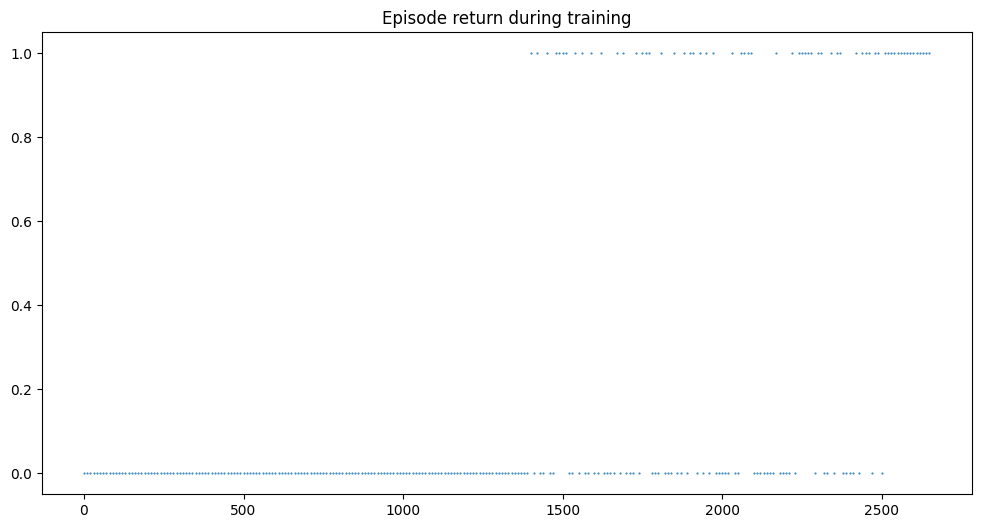

In [17]:
# create a low resultion plot to see the returns progress
x,y =[],[]
for i in range(len(returns_history)):
    if(i%10==0):
        x.append(i)
        y.append(returns_history[i])

plt.figure(figsize=(12,6))
plt.plot(x,y, '.',markersize=1)
plt.title("Episode return during training")
plt.show()